In [40]:
import pandas as pd
df=pd.read_csv("spotify_tracks.csv")

In [41]:
df

,id,name,genre,artists,album,popularity,duration_ms,explicit
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False
...,...,...,...,...,...,...,...,...
6295,4uveHSzaz8YEbTF9j6QlCI,Voyage to Atlantis,world-music,Future World Music,Reign of Vengeance,25,180001,False
6296,4u15cjyziW2Ewn5Ek3082l,L'Oiseau,world-music,"Putumayo, Marianne Perrudin, Thomas Artaud",Global Relaxation by Putumayo,25,276776,False
6297,56pHPaTeX2O9aVmTFYS8hV,The Daintree,world-music,Joseph Tawadros,World Music,12,69533,False
6298,6Ldyc5TsR4kaUsuHKcB2AD,The Sorcerers Symphony,world-music,Future World Music,Behold,26,90001,False


In [42]:
df.shape

(6300, 8)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           6300 non-null   object
 1   name         6300 non-null   object
 2   genre        6300 non-null   object
 3   artists      6300 non-null   object
 4   album        6300 non-null   object
 5   popularity   6300 non-null   int64 
 6   duration_ms  6300 non-null   int64 
 7   explicit     6300 non-null   bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 350.8+ KB


In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['id']=le.fit_transform(df['id'])
df['name']=le.fit_transform(df['name'])
df['genre']=le.fit_transform(df['genre'])
df['artists']=le.fit_transform(df['artists'])
df['album']=le.fit_transform(df['album'])
df['explicit']=le.fit_transform(df['explicit'])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           6300 non-null   int64
 1   name         6300 non-null   int64
 2   genre        6300 non-null   int64
 3   artists      6300 non-null   int64
 4   album        6300 non-null   int64
 5   popularity   6300 non-null   int64
 6   duration_ms  6300 non-null   int64
 7   explicit     6300 non-null   int64
dtypes: int64(8)
memory usage: 393.9 KB


In [46]:
df.isnull().sum()

id             0
name           0
genre          0
artists        0
album          0
popularity     0
duration_ms    0
explicit       0
dtype: int64

In [47]:
df.duplicated().sum()

np.int64(0)

In [48]:
df.describe()

,id,name,genre,artists,album,popularity,duration_ms,explicit
count,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6.300000e+03,6300.000000
mean,3095.323968,2230.523651,62.500000,2327.407937,2449.155079,30.754762,2.028477e+05,0.189524
std,1785.786283,1267.964951,36.374808,1329.105332,1417.500292,19.948991,1.210299e+05,0.391955
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.006000e+04,0.000000
25%,1551.750000,1141.750000,31.000000,1171.750000,1231.750000,16.000000,1.476870e+05,0.000000
50%,3097.500000,2198.500000,62.500000,2317.500000,2450.500000,29.000000,1.916070e+05,0.000000
75%,4639.250000,3298.250000,94.000000,3480.250000,3655.250000,45.000000,2.369625e+05,0.000000
max,6186.000000,4517.000000,125.000000,4650.000000,4948.000000,90.000000,3.601658e+06,1.000000


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
value=df['explicit'].value_counts()
value

explicit
0    5106
1    1194
Name: count, dtype: int64

<Axes: xlabel='explicit', ylabel='count'>

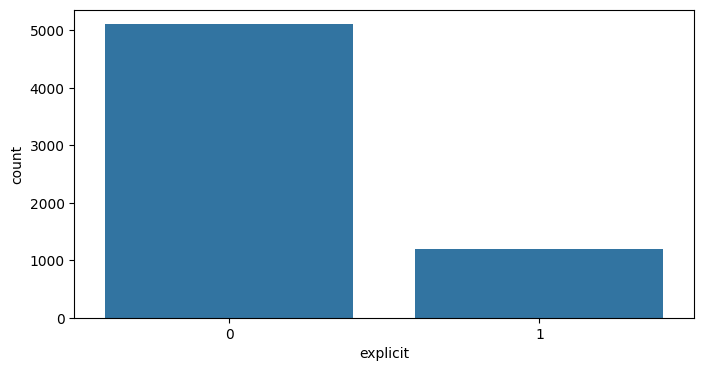

In [52]:
plt.figure(figsize=(8,4))
sns.countplot(x='explicit',data=df)

In [53]:
from imblearn.under_sampling import RandomUnderSampler
x=df.drop(columns="explicit",axis=1)
y=df["explicit"]
smote=RandomUnderSampler(sampling_strategy="majority")
x_sm,y_sm=smote.fit_resample(x,y)
print(x_sm.shape)
print(y_sm.shape)

(2388, 7)
(2388,)


In [57]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)
print(x)

[[0.97171031 0.0157184  0.         ... 0.00788197 0.64444444 0.03979703]
 [0.23181377 0.0157184  0.         ... 0.01839127 0.63333333 0.03979787]
 [0.871484   0.37812708 0.         ... 0.37853678 0.46666667 0.03212176]
 ...
 [0.66197866 0.86163383 1.         ... 0.9454325  0.13333333 0.01105192]
 [0.81393469 0.87713084 1.         ... 0.09135004 0.28888889 0.01678268]
 [0.50355642 0.27363294 1.         ... 0.9458367  0.27777778 0.03128572]]


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8150793650793651
[[1027    0]
 [ 233    0]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1027
           1       0.00      0.00      0.00       233

    accuracy                           0.82      1260
   macro avg       0.41      0.50      0.45      1260
weighted avg       0.66      0.82      0.73      1260



c:\Users\thenm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\thenm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\thenm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8150793650793651
[[1027    0]
 [ 233    0]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1027
           1       0.00      0.00      0.00       233

    accuracy                           0.82      1260
   macro avg       0.41      0.50      0.45      1260
weighted avg       0.66      0.82      0.73      1260



c:\Users\thenm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\thenm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\thenm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave